In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = '/content/drive/MyDrive/data1'
df_train = pd.read_csv('/content/drive/MyDrive/data1/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/data1/test.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [6]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


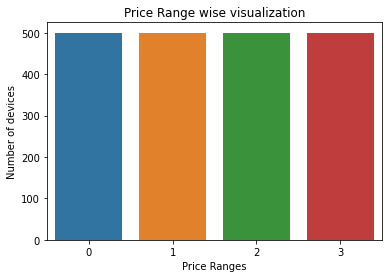

In [7]:
sns.countplot(x='price_range', data=df_train)
plt.xlabel('Price Ranges')
plt.ylabel('Number of devices')
plt.title('Price Range wise visualization')
plt.show()

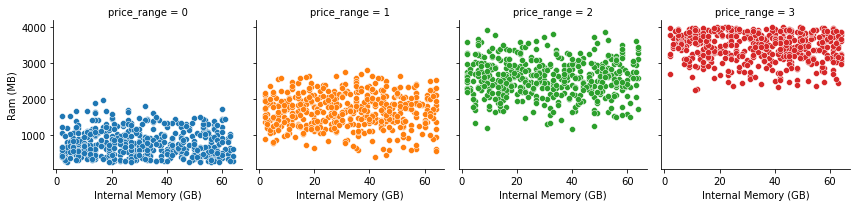

In [10]:
g = sns.FacetGrid(df_train, col="price_range", hue="price_range")
g.map(sns.scatterplot, "int_memory", "ram")
g.set_axis_labels("Internal Memory (GB)", "Ram (MB)")

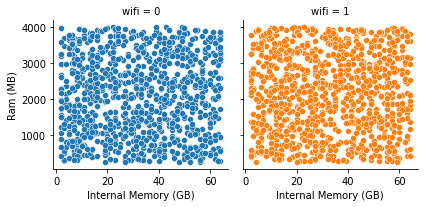

In [11]:
g = sns.FacetGrid(df_train, col="wifi", hue="wifi")
g.map(sns.scatterplot, "int_memory", "ram")
g.set_axis_labels("Internal Memory (GB)", "Ram (MB)")

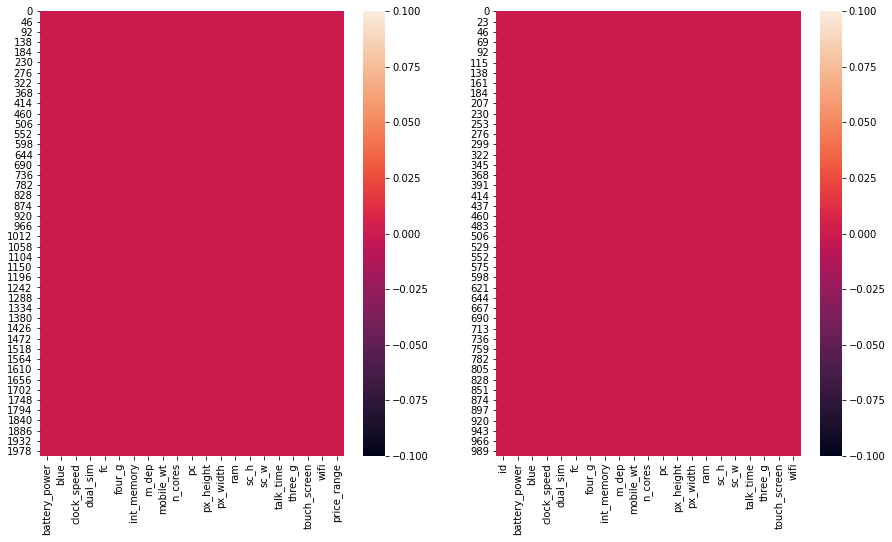

In [17]:
#By Plotting We are checking for missing values
plt.figure(figsize=(15,18))
plt.subplot(221)
sns.heatmap(data=df_train.isnull())
plt.subplot(222)
sns.heatmap(data=df_test.isnull())


DataSet is good we don't find any missing values

<Figure size 720x288 with 0 Axes>

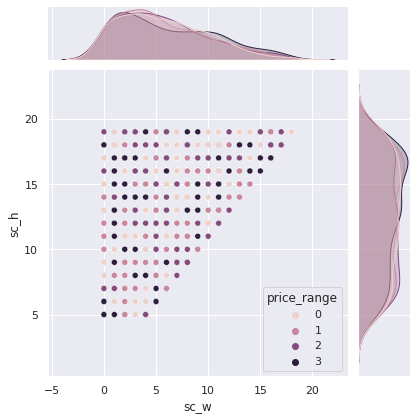

In [18]:
# Visulize Screen size (Height x Width) vs Price Range

plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
sns.set(font_scale=1)
g = sns.jointplot(data=df_train, x="sc_w", y="sc_h", hue="price_range") #sc_w - screen width, sc_h - screen height
plt.show()

We can see data is dispersed for screen width and its height

In [25]:
train_x = df_train.drop('price_range', axis=1)
train_y = df_train.price_range
train_x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=2)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [41]:
#Checking Precision by using different Algo
models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "KNN": KNeighborsClassifier(),
    "SVM" :SVC(),
    "Naive Bayes": GaussianNB(),
    "Decisiontree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(max_features='sqrt', random_state=5),
    "LogisticRegression": LogisticRegression()
}

In [44]:
for model in models.items():
    m = model[1]
    m.fit(x_train, y_train)
    print(model[0])
    print("Score: ", m.score(x_test,y_test))
    print("")

Linear Regression
Score:  0.917989082336092

KNN
Score:  0.9133333333333333

SVM
Score:  0.95

Naive Bayes
Score:  0.835

Decisiontree
Score:  0.8283333333333334

RandomForest
Score:  0.8866666666666667

LogisticRegression
Score:  0.6533333333333333



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


As we can see SVM gives us the highest Accuracy so we will use it.

In [47]:
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(SVC(), x_train, y_train, cv=3)

confusion_matrix(y_train, y_train_pred)

array([[346,   6,   0,   0],
       [  6, 321,  14,   0],
       [  0,  17, 315,  21],
       [  0,   0,  13, 341]])

<H3> Prediction on Test Data</H3>

In [51]:
# Preparing test dataset
data_test = df_test.drop('id',axis=1)

In [52]:
x = df_train.drop('price_range', axis=1)
y = df_train['price_range']
# Predict price range using SVM model
svm = SVC()
svm.fit(x, y)
pred_price = svm.predict(data_test)
data_test['price_range'] = pred_price

In [53]:
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,2


You can check now that test_data has one more column that is Price_range created using SVM Model.